In [138]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [139]:
race_percentages_df = pd.read_csv('racePercentages.csv')
race_percentages_df.drop( race_percentages_df[race_percentages_df['Location'] == 'Puerto Rico'].index, inplace=True)

In [140]:
shootings_df = pd.read_csv('PoliceShootings.csv')
states_namesAndCodes = pd.read_csv('us_codes.csv')

## Replace states names with their codes

In [141]:
dic = states_namesAndCodes.set_index('State').to_dict()

In [142]:
race_percentages_df['Location'] = race_percentages_df['Location'][1:].map(dic['Code'])

## Modify somethings in the shootings dataFrame

### Extract the Month and Year values to seperate columns

In [143]:
shootings_df['Month']  = shootings_df.apply(lambda row : row['date'].split('/')[1], axis=1)
shootings_df['Year'] = shootings_df.apply(lambda row : row['date'].split('/')[2], axis=1)

### Drop unnecessary columns

In [144]:
shootings_df.drop(['date', 'city', 'name'], axis=1, inplace=True)

### Drop unnecessary rows

In [145]:
shootings_df = shootings_df.drop( shootings_df[shootings_df['race'] == 'Other'].index )

## Visualize

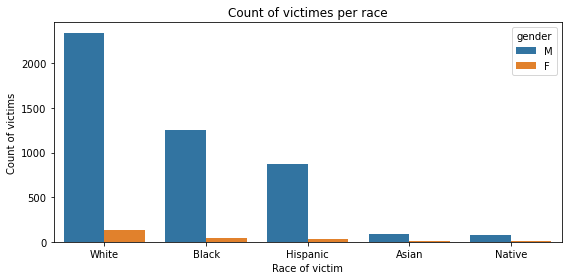

In [146]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x="race", hue="gender",data=shootings_df, order=["White", "Black", "Hispanic", "Asian", "Native"])
ax.set(ylabel="Count of victims", xlabel="Race of victim", title="Count of victimes per race")
plt.tight_layout()

### However we need to take into consideration the population percentages by race

#### according to https://www.census.gov/quickfacts/fact/table/US/PST045219

In [147]:
total_population_of_us = 328239523

In [149]:
population_by_race = race_percentages_df.iloc[0][1:].apply(lambda x : int(float(x) * 328239523))

In [152]:
count_of_shootings_in_million_by_race = ((shootings_df.groupby('race').size() * 1000000 ) / population_by_race).apply(lambda x:int(x))b

In [154]:
count_of_shootings_in_million_by_race

Asian        4
Black       32
Hispanic    15
Native      23
White       12
dtype: int64

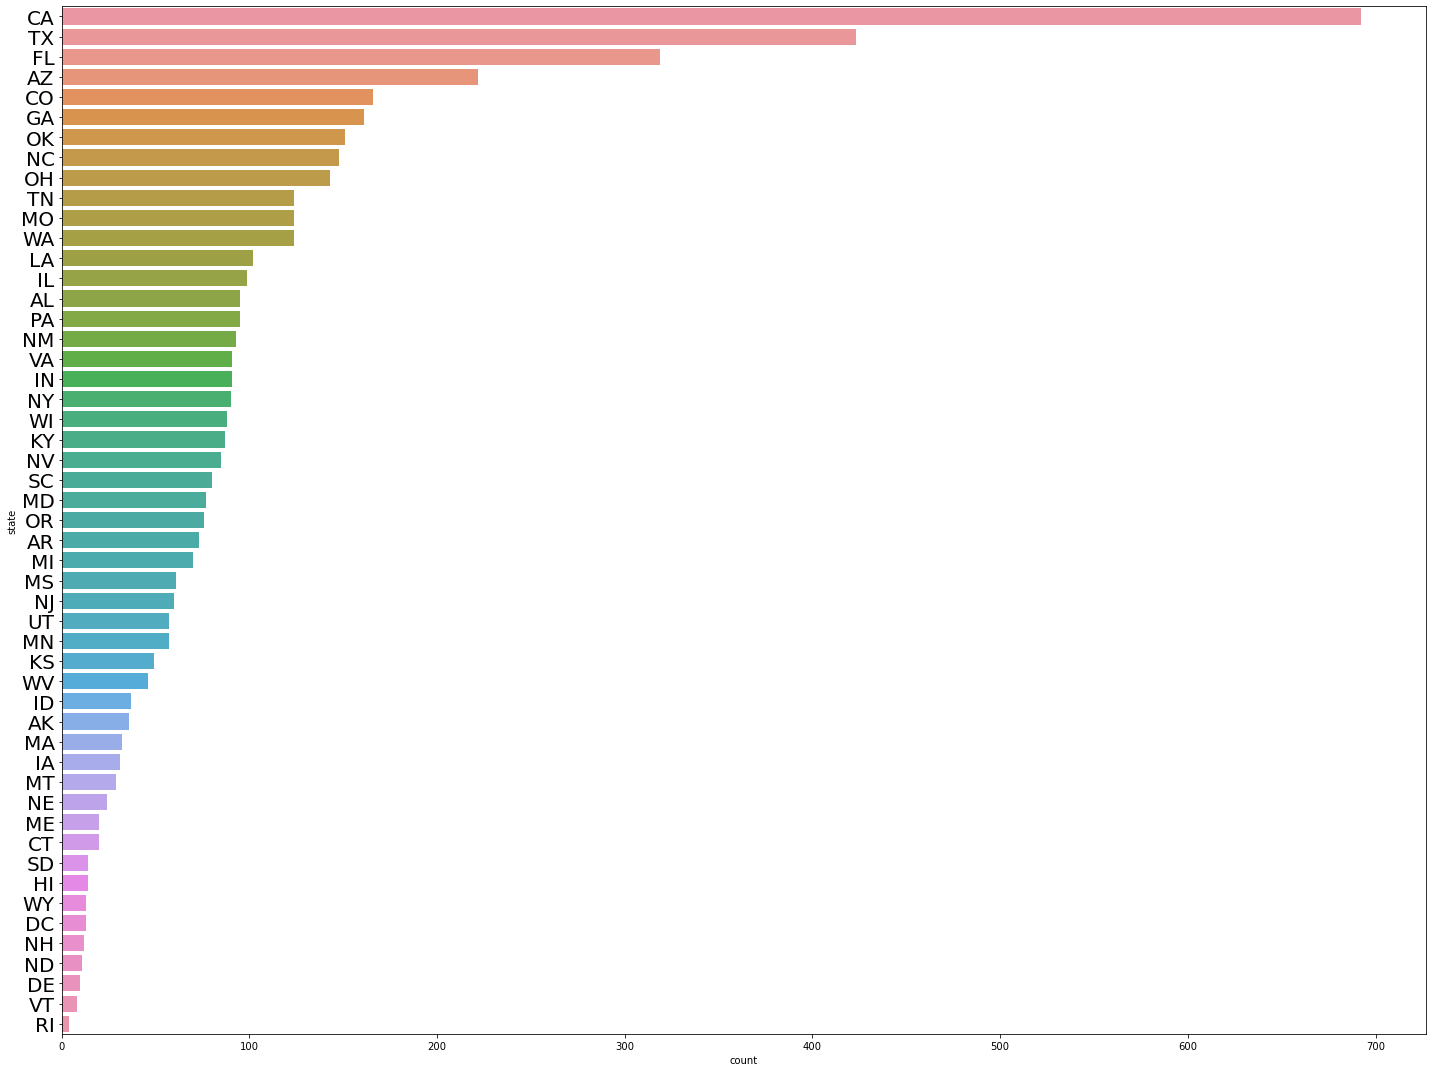

In [28]:
plt.figure(figsize=(20,15))
ax = sns.countplot(y="state", data=shootings_df, orient="h", order= shootings_df['state'].value_counts().index)

ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)


plt.tight_layout()

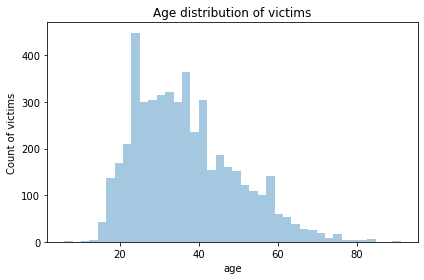

In [29]:
ax = sns.distplot(shootings_df['age'], kde=False)
ax.set(title="Age distribution of victims", ylabel="Count of victims")
plt.tight_layout()

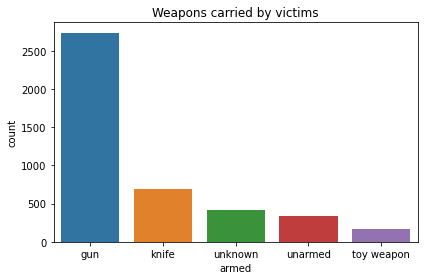

In [30]:
order = shootings_df['armed'].value_counts()[:5].index
ax= sns.countplot(x='armed',data=shootings_df, orient="h",  order= order)
ax.set(title="Weapons carried by victims")
plt.tight_layout()